In [6]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
%matplotlib inline

In [7]:
import seaborn as sns

In [8]:
df = pd.read_csv('bond_angles.csv')

In [9]:
df

,Atom,EXP,AM1,PM3,INDO,PM3MM,B3LYP/6-311G,B3LYP/LanL2DZ
0,C1 -N1 -C11,125.05,120.8,118.4,124.1,118.4,110.9,123.8
1,S1 -C1 -N1,122.53,110.7,110.7,110.6,110.7,110.6,106.4
2,S1 -C1 -N1_a,122.53,110.7,112.7,110.4,112.7,110.4,115.1
3,N1 -C1 -N1_a,114.96,105.0,110.6,110.9,110.6,110.9,113.5
4,C1 -N1 -H1,118.00,113.1,112.0,118.1,112.0,107.7,114.2
5,C11 -N1 -H1,118.00,113.1,112.5,117.8,112.3,110.1,117.1
6,N1 -C11 -C12,119.65,119.6,119.0,119.0,119.0,119.0,118.7


In [10]:
df.set_index('Atom')

,EXP,AM1,PM3,INDO,PM3MM,B3LYP/6-311G,B3LYP/LanL2DZ
Atom,,,,,,,
C1 -N1 -C11,125.05,120.8,118.4,124.1,118.4,110.9,123.8
S1 -C1 -N1,122.53,110.7,110.7,110.6,110.7,110.6,106.4
S1 -C1 -N1_a,122.53,110.7,112.7,110.4,112.7,110.4,115.1
N1 -C1 -N1_a,114.96,105.0,110.6,110.9,110.6,110.9,113.5
C1 -N1 -H1,118.00,113.1,112.0,118.1,112.0,107.7,114.2
C11 -N1 -H1,118.00,113.1,112.5,117.8,112.3,110.1,117.1
N1 -C11 -C12,119.65,119.6,119.0,119.0,119.0,119.0,118.7


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Atom           7 non-null      object 
 1   EXP            7 non-null      float64
 2   AM1            7 non-null      float64
 3   PM3            7 non-null      float64
 4   INDO           7 non-null      float64
 5   PM3MM          7 non-null      float64
 6   B3LYP/6-311G   7 non-null      float64
 7   B3LYP/LanL2DZ  7 non-null      float64
dtypes: float64(7), object(1)
memory usage: 576.0+ bytes


In [12]:
corr_coeff = df.corr(method='pearson', numeric_only=True)

In [13]:
print(f'Correlation coefficient: {corr_coeff}')

Correlation coefficient:                     EXP       AM1       PM3      INDO     PM3MM  B3LYP/6-311G  \
EXP            1.000000  0.575838  0.455027  0.273122  0.459203      0.038120   
AM1            0.575838  1.000000  0.916083  0.863541  0.913243      0.465579   
PM3            0.455027  0.916083  1.000000  0.767930  0.999775      0.679163   
INDO           0.273122  0.863541  0.767930  1.000000  0.761791      0.187097   
PM3MM          0.459203  0.913243  0.999775  0.761791  1.000000      0.680211   
B3LYP/6-311G   0.038120  0.465579  0.679163  0.187097  0.680211      1.000000   
B3LYP/LanL2DZ  0.237069  0.709287  0.802401  0.817862  0.796870      0.278966   

               B3LYP/LanL2DZ  
EXP                 0.237069  
AM1                 0.709287  
PM3                 0.802401  
INDO                0.817862  
PM3MM               0.796870  
B3LYP/6-311G        0.278966  
B3LYP/LanL2DZ       1.000000  


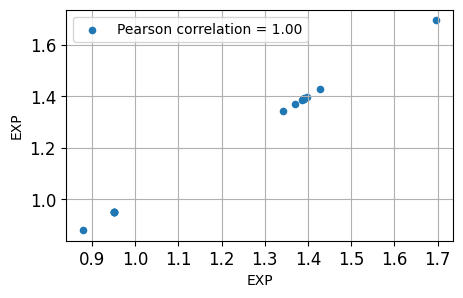

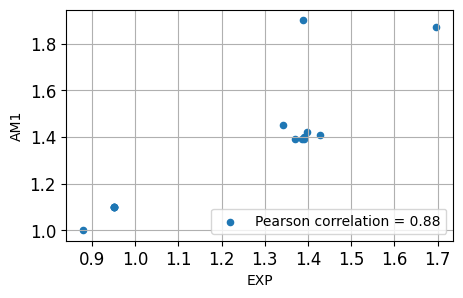

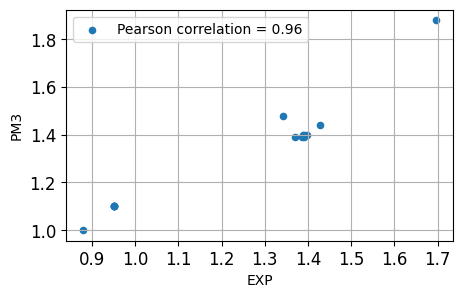

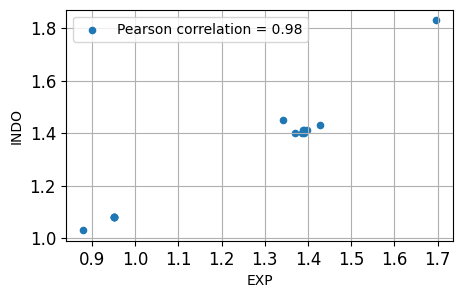

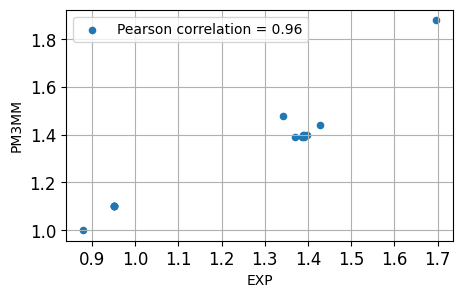

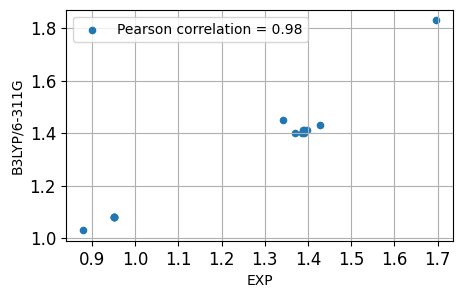

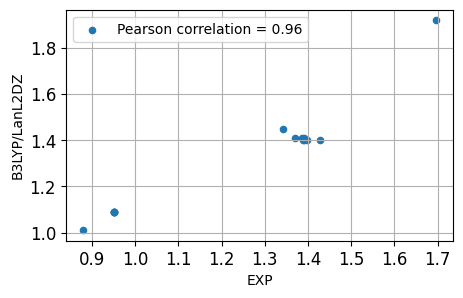

In [24]:
for col in df.columns[1:]:
    # Calculate Pearson correlation coefficient
    corr_coeff = df['EXP'].corr(df[col])
    
    # Create scatter plot
    df.plot.scatter('EXP', col, label=f'Pearson correlation = {corr_coeff:.2f}',
                    figsize=(5, 3), subplots=True, style='o', fontsize=12, grid=True)

plt.show()

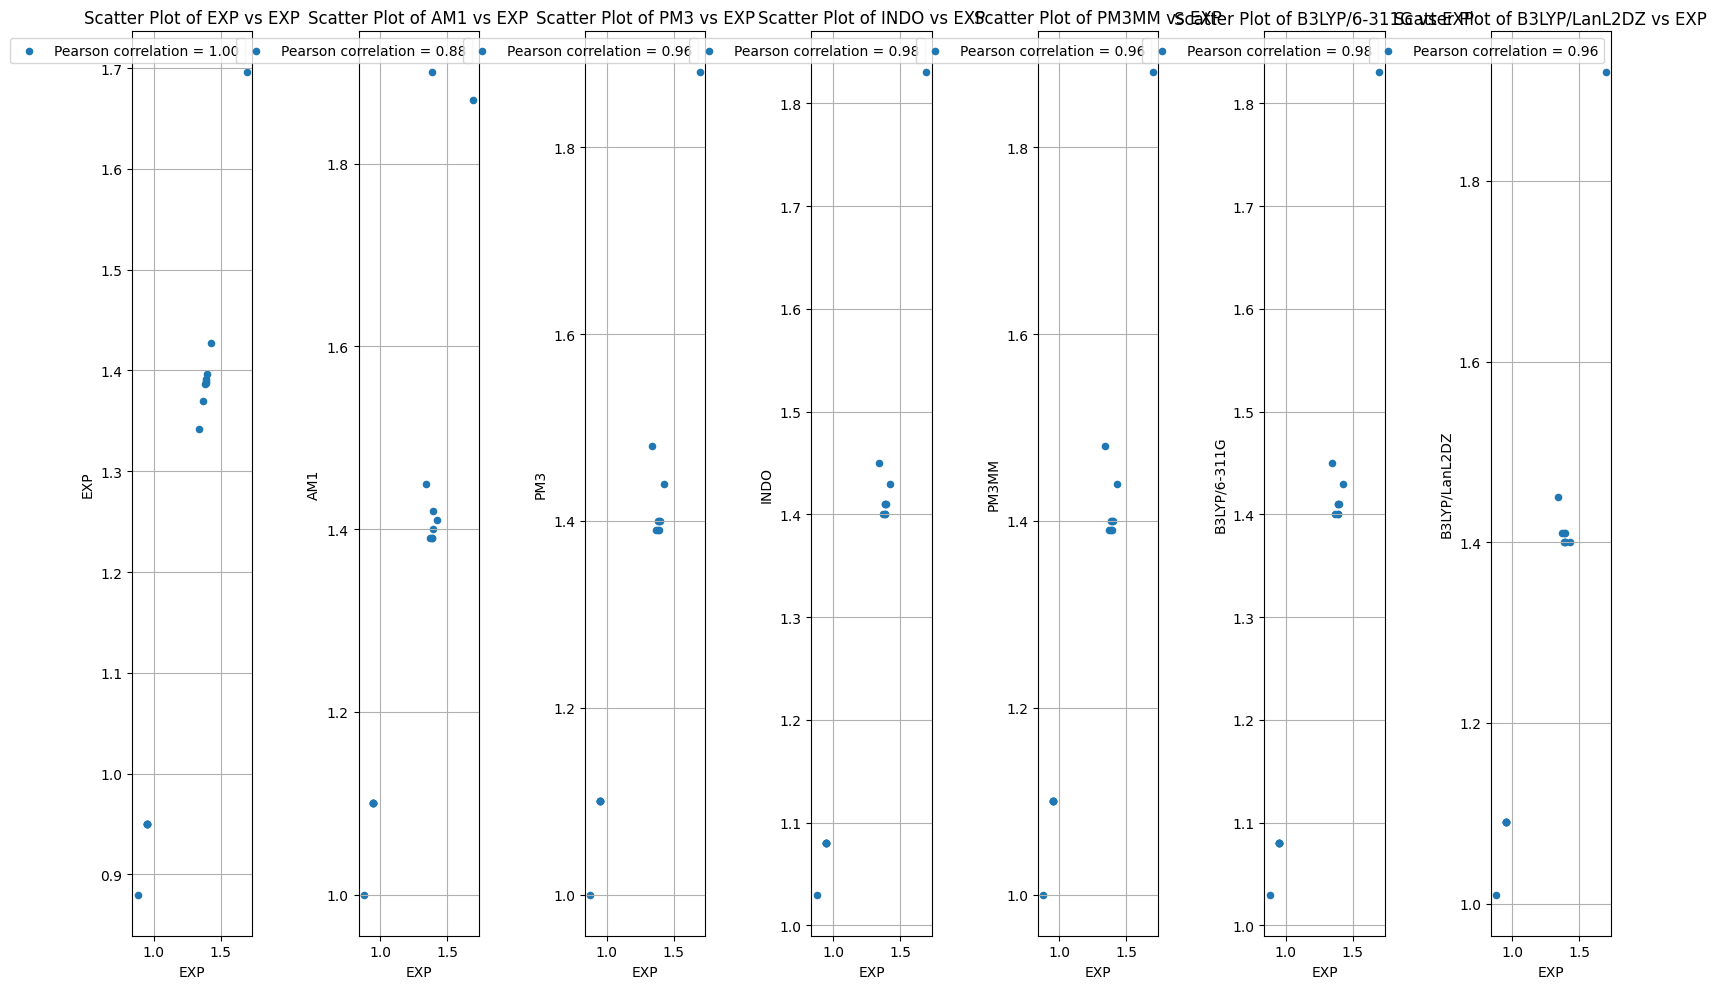

In [33]:
# Get the number of columns (excluding the 'EXP' column)
num_cols = len(df.columns) - 1

# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(16, 10))

# Loop over DataFrame columns (excluding the 'EXP' column)
for i, col in enumerate(df.columns[1:]):
    # Calculate Pearson correlation coefficient
    corr_coeff = df['EXP'].corr(df[col])
    
    # Create scatter plot on the appropriate subplot
    ax = axes[i]
    df.plot.scatter('EXP', col, label=f'Pearson correlation = {corr_coeff:.2f}', ax=ax, style='o', grid=True)
    ax.set_xlabel('EXP')
    ax.set_ylabel(col)
    ax.set_title(f'Scatter Plot of {col} vs EXP')

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()

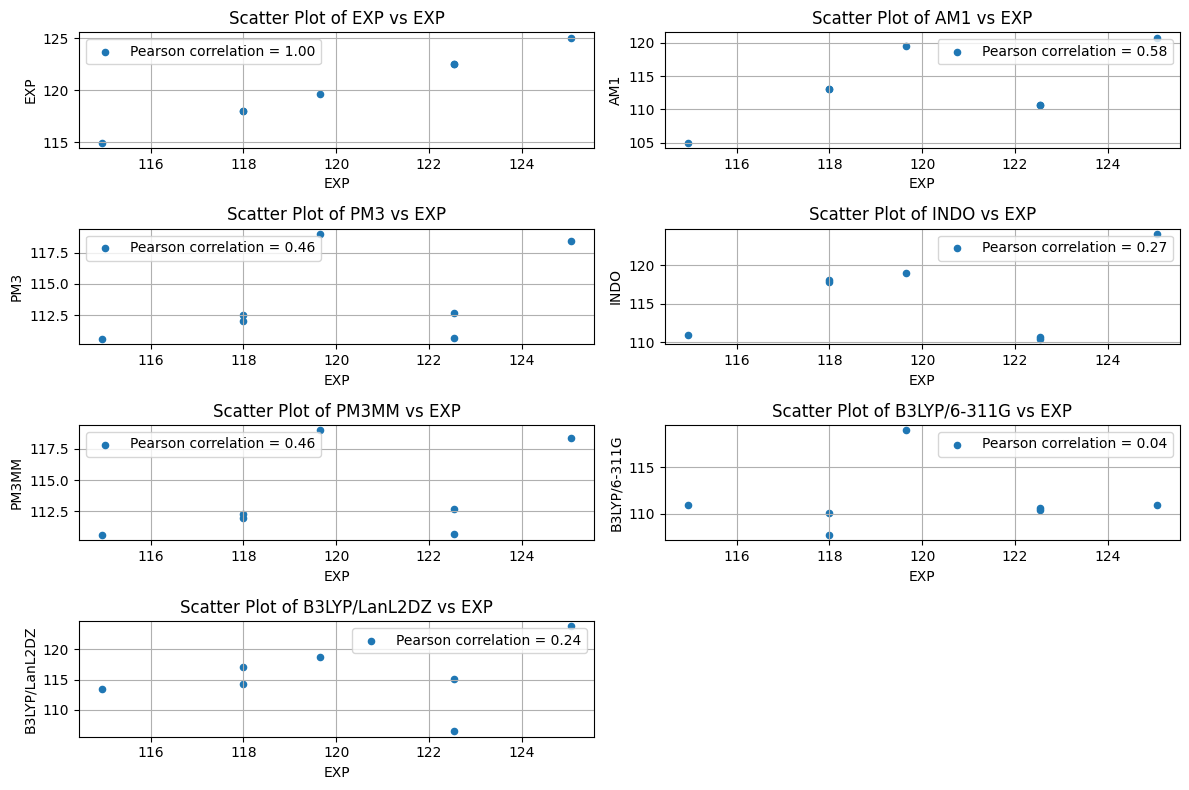

In [14]:
# Get the number of columns (excluding the 'EXP' column)
num_cols = len(df.columns) - 1

# Calculate the number of rows needed
num_rows = (num_cols + 1) // 2

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 8))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Loop over DataFrame columns (excluding the 'EXP' column)
for i, col in enumerate(df.columns[1:]):
    # Calculate Pearson correlation coefficient
    corr_coeff = df['EXP'].corr(df[col])
    
    # Create scatter plot on the appropriate subplot
    ax = axes[i]
    df.plot.scatter('EXP', col, label=f'Pearson correlation = {corr_coeff:.2f}', ax=ax, style='o', grid=True)
    ax.set_xlabel('EXP')
    ax.set_ylabel(col)
    ax.set_title(f'Scatter Plot of {col} vs EXP')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlap
plt.tight_layout()

#plt.show()
plt.savefig('fig_angles.svg', bbox_inches='tight')

/tmp/ipykernel_2484/1708035133.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm').plot(rot=(0), figsize=(15,10), style=['classic'])


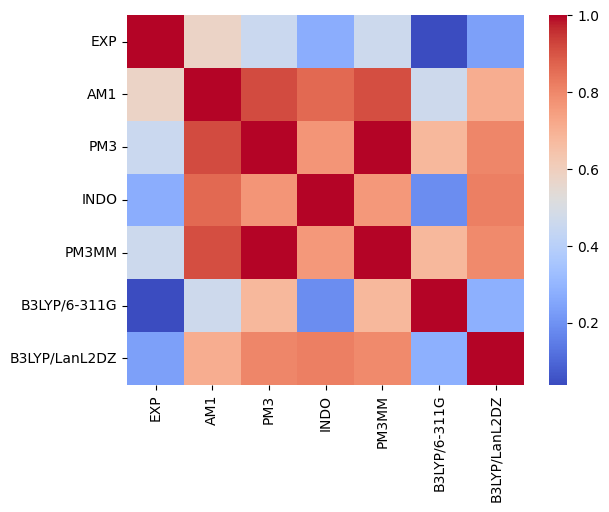

In [15]:
sns.heatmap(df.corr(), cmap='coolwarm').plot(rot=(0), figsize=(15,10), style=['classic'])

#plt.title('corr() of Domestic Extraction with biomass usage, number of planters, import and exports')

plt.savefig('fig_angle2.svg', bbox_inches='tight')